In [1]:
import numpy as np

import torch

from torch.nn.modules.module import Module
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:6') if use_cuda else torch.device('cpu')

# One-dimensional cellular automata
## generate data

In [2]:
def decimalToBinary(num, lst=[]):
    """This function converts decimal number
    to binary and prints it
    """
    if num > 1:
        lst = decimalToBinary(num // 2, lst)
    lst.append(num % 2)
    return lst
def binaryToDecimal(lst):
    if len(lst)==0:
        return -1
    val = lst[0]
    for i in lst[1:]:
        val = val * 2 + i
    return val
def makeRule(value, length=8):
    'Decimal to binary, and fixed by 0 before the length bi'
    lst = decimalToBinary(value, [])
    ll = len(lst)
    for i in range(ll, length):
        lst = [0] + lst
    return lst
def CAOneStep(state, rule, radius = 1):
    '''
    Starting with state and evolving further, rule is the rule number of the CA
    output: the next time state
    '''
    n_state = []
    for i in range(len(state)):
        neighbors = np.arange(i - radius, i + radius + 1)
        neighbors = neighbors % len(state) 
        nb_states = np.array(state)[neighbors] 
        idx = int(binaryToDecimal(nb_states))  
        sss = rule[len(rule) - 1 - idx]
        n_state.append(sss)

    return n_state
def iter_CA(ini_state, rule_number, steps = 100):
    '''
    generate data
    ini_state: init state
    rule_number: 8 bit
    '''
    lst = makeRule(rule_number, 8)
#     print(lst)
#     de
    state = ini_state
    history = [state]
    for t in range(steps):
        state = CAOneStep(state, lst)
        history.append(state)
    return state, history
def distill_rules(histories):
    cases = {}
    for new_history in histories:
        for t in range(new_history.size()[0] - 1):
            for i in range(new_history.size()[1]):
                left = (i - 1) % new_history.size()[1]
                right = (i + 1) % new_history.size()[1]
                mid = i
                next1 = new_history[t+1, mid].item()
                tup = (new_history[t, left].item(),new_history[t, mid].item(),new_history[t, right].item())
                val = cases.get(tup, {})
                cn = val.get(next1, 0)
                val[next1] = cn + 1
                cases[tup] = val
    return cases

14
[0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 1, 1]
[1, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 0]
[1, 1, 0, 0, 1, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 1]


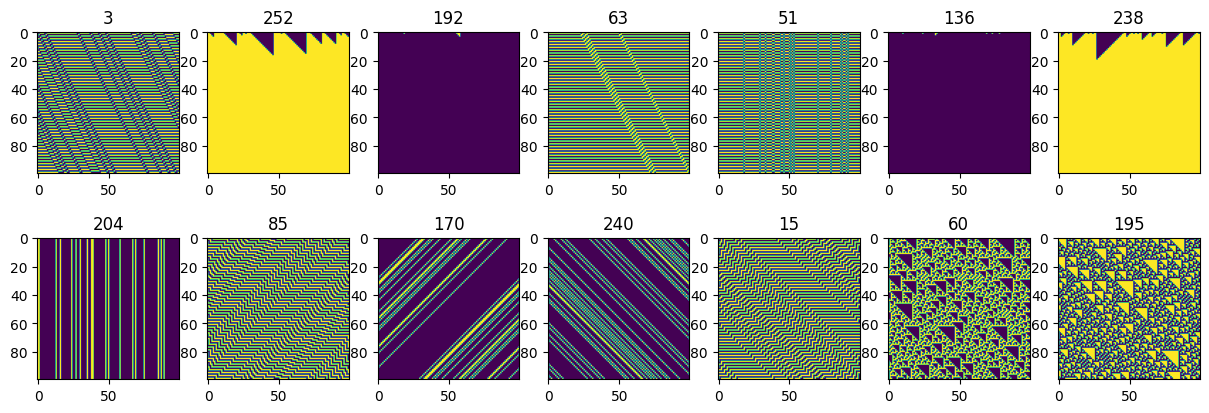

In [4]:
rules = [3,252,192,63,51,136,238,204,85,170,240,15,60,195]
print(len(rules))
plt.figure(dpi=100,figsize=(15,5))
time_len = 100
width = 100
for i,rule in enumerate(rules):
#     print(rule)
    plt.subplot(2,7,i+1)
    state = np.zeros(width)
    indexs = np.random.choice(99,20)
    state[indexs] = 1

    state,history = iter_CA(state, rule, time_len-1)
    plt.imshow(history)
    plt.title(rule)
plt.show()

In [12]:
rule=150
group_size=3
projection_rule=9
histories = []
width = 120
time_len = 180
samples = 100

for i in range(samples):
    print(i)
#     print(np.random.randint(0, 2, [width]).shape)
    state = np.zeros(width)
#     state = np.random.randint(0, 2, [width]) #生成99维的0,1随机数
    indexs = np.random.choice(99,10)
    state[indexs] = 1
    
    state,history = iter_CA(state, rule, time_len-1)
    #renormalize(history, adj_space)
    histories.append(history)
    

0
[1, 0, 0, 1, 0, 1, 1, 0]
1
[1, 0, 0, 1, 0, 1, 1, 0]
2
[1, 0, 0, 1, 0, 1, 1, 0]
3
[1, 0, 0, 1, 0, 1, 1, 0]
4
[1, 0, 0, 1, 0, 1, 1, 0]
5
[1, 0, 0, 1, 0, 1, 1, 0]
6
[1, 0, 0, 1, 0, 1, 1, 0]
7
[1, 0, 0, 1, 0, 1, 1, 0]
8
[1, 0, 0, 1, 0, 1, 1, 0]
9
[1, 0, 0, 1, 0, 1, 1, 0]
10
[1, 0, 0, 1, 0, 1, 1, 0]
11
[1, 0, 0, 1, 0, 1, 1, 0]
12
[1, 0, 0, 1, 0, 1, 1, 0]
13
[1, 0, 0, 1, 0, 1, 1, 0]
14
[1, 0, 0, 1, 0, 1, 1, 0]
15
[1, 0, 0, 1, 0, 1, 1, 0]
16
[1, 0, 0, 1, 0, 1, 1, 0]
17
[1, 0, 0, 1, 0, 1, 1, 0]
18
[1, 0, 0, 1, 0, 1, 1, 0]
19
[1, 0, 0, 1, 0, 1, 1, 0]
20
[1, 0, 0, 1, 0, 1, 1, 0]
21
[1, 0, 0, 1, 0, 1, 1, 0]
22
[1, 0, 0, 1, 0, 1, 1, 0]
23
[1, 0, 0, 1, 0, 1, 1, 0]
24
[1, 0, 0, 1, 0, 1, 1, 0]
25
[1, 0, 0, 1, 0, 1, 1, 0]
26
[1, 0, 0, 1, 0, 1, 1, 0]
27
[1, 0, 0, 1, 0, 1, 1, 0]
28
[1, 0, 0, 1, 0, 1, 1, 0]
29
[1, 0, 0, 1, 0, 1, 1, 0]
30
[1, 0, 0, 1, 0, 1, 1, 0]
31
[1, 0, 0, 1, 0, 1, 1, 0]
32
[1, 0, 0, 1, 0, 1, 1, 0]
33
[1, 0, 0, 1, 0, 1, 1, 0]
34
[1, 0, 0, 1, 0, 1, 1, 0]
35
[1, 0, 0, 1, 0, 1, 1, 0]
36

In [13]:
histories = np.array(histories)
print(histories.shape)


(100, 180, 120)


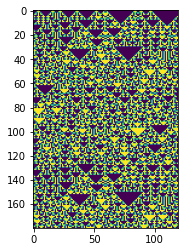

In [14]:
plt.figure()
plt.imshow(histories[0,:,:])

In [15]:
import pickle as pkl

In [16]:
with open(f'./data/CA/CA_data_{rule}.pkl','wb') as f:
    pkl.dump({
        'histories':histories,
        }
             ,f)

In [17]:
histories[0,0,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])